# Procesamiento de Lenguage Natural

## Taller 11: Análisis de sentimiento

# Método de Recolectar información

# 1. Autenticarse con twitter

In [3]:
import pandas as pd
import tweepy

In [4]:
ruta = "C:/Archivo/"

In [5]:
# Leer llaves
keys = pd.read_csv(ruta + "keys_tokens.csv", header=None)
keys = dict(zip(keys[0],keys[1]))

In [6]:
# Autorizar a través API
auth = tweepy.OAuthHandler(keys['key1'], keys['key2'])
auth.set_access_token(keys['token1'], keys['token2'])
#hace pausas en la recolecciòn de informaciòn para que twitter no se moleste
api = tweepy.API(auth, wait_on_rate_limit=True)

# 2. Recolectar Datos
## Se realizó una revisión de las tendencias en Twitter al día 19 de noviembre de 2020 (ventana de 7 días a tras), para conocer la opinión de las personas frente a los resultados de la última feha de eliminatoria.

### 2.1 Se realiza el cargue del archivo de cordenadas de ciudades de Colombia

In [7]:
ciudades = pd.read_csv(ruta + 'co_small.csv')
ciudades.head()

,city,lat,lng,country,iso2,admin,capital,population,population_proper
0,Bogotá,4.649178,-74.062827,Colombia,CO,Bogotá,primary,7772000.0,6333661.0
1,Medellín,6.251840,-75.563591,Colombia,CO,Antioquia,admin,3297000.0,1999979.0
2,Cali,3.437222,-76.522500,Colombia,CO,Valle del Cauca,admin,2254000.0,2178836.0
3,Barranquilla,10.963889,-74.796389,Colombia,CO,Atlántico,admin,1798000.0,1244491.0
4,Bucaramanga,7.125393,-73.119804,Colombia,CO,Santander,admin,1009000.0,571820.0


### 2.2 Extraer información de acuerdo con las coordenadas a traves de un bucle

In [8]:
all_tweets = [] 

for ciudad in ciudades.iterrows():
    c = ciudad[1]
    gc = f"{c.lat},{c.lng},100km"                                 #coordenadas con rango de 100 Km alrededor
    c_name = c.city
    
    tweets = tweepy.Cursor(api.search,
                       q=['selección Colombia -RT'],       #Frase de busqueda. -RT: para no capturar re tweets
                       lang='es',                                 #idioma  
                       geocode=gc,                                #coordenadas
                       tweet_mode='extended',                     #extended para que salga todo el texto
                       include_rts=False).items(100)              #número de tweets
    
    t = []

    for tweet in tweets:
        temp = []
        temp.append(tweet.full_text)                                #Texto
        temp.append(tweet.created_at)                               #fecha
        temp.append(c_name)                                         #Ciudad
        temp.append(tweet.user.location)                            #Usuario
        temp.append(tweet.place)                                    #Lugar que registra el propietario de la cuenta
        temp.append(tweet.coordinates)                              #coordenadas
        temp.append(tweet.id)                                       #código que Twitter asigna a las cuentas (es unico)
        temp.append(f"https://twitter.com/i/web/status/{tweet.id}") #link del tweet
        t.append(temp)
    all_tweets.extend(t)
    print(c_name)  

Bogotá
Medellín
Cali
Barranquilla
Bucaramanga
Cartagena
Cúcuta
Pereira
Santa Marta
Ibagué
Pasto
Manizales
Villavicencio
Neiva
Armenia
Valledupar
Montería
Sincelejo
Popayán
Tunja
Ríohacha
Florencia
Quibdó
Arauca
Yopal
Leticia
San Andrés
San José del Guaviare
Mocoa
Puerto Carreño
Mitú
Inírida


In [9]:
data = pd.DataFrame(all_tweets)
data.columns = ['tweet', 'date', 'city', 'user_location', 'place', 'coordinates', 'id', 'link']
data

,tweet,date,city,user_location,place,coordinates,id,link
0,"José Pékerman, otra vez? El viejito me hizo fe...",2020-11-19 23:26:50,Bogotá,Bogotá.,None,None,1329566835679879170,https://twitter.com/i/web/status/1329566835679...
1,James Rodríguez emitió un comunicado dónde des...,2020-11-19 23:24:49,Bogotá,"Manizales, Colombia",None,None,1329566326755627010,https://twitter.com/i/web/status/1329566326755...
2,¿Les gustaría que vuelva José Pékerman? Así ha...,2020-11-19 23:22:44,Bogotá,"Bogotá, D.C., Colombia",None,None,1329565805458108416,https://twitter.com/i/web/status/1329565805458...
3,⚽️🇨🇴 | @FCFSeleccionCol y @FCFSeleccionCol d...,2020-11-19 23:20:40,Bogotá,"Bogotá, D.C., Colombia",None,None,1329565283045019648,https://twitter.com/i/web/status/1329565283045...
4,Este fue el comunicado a la opinión pública ht...,2020-11-19 23:14:46,Bogotá,"Bogotá, Colombia",None,None,1329563799641333761,https://twitter.com/i/web/status/1329563799641...
...,...,...,...,...,...,...,...,...
2688,Pekerman llegó a la Selección Colombia e hizo...,2020-11-17 21:54:48,Inírida,"Meta, Colombia",None,None,1328818898729316354,https://twitter.com/i/web/status/1328818898729...
2689,Una selección Colombia 🇨🇴 nunca antes vista 🥺😩,2020-11-17 21:44:10,Inírida,"Meta, Colombia",None,None,1328816222587248643,https://twitter.com/i/web/status/1328816222587...
2690,Cuenta la leyenda que la selección Colombia te...,2020-11-17 21:32:35,Inírida,"Meta, Colombia",None,None,1328813306581299202,https://twitter.com/i/web/status/1328813306581...
2691,Hace mucho tiempo jugar en Barranquilla dejó d...,2020-11-13 21:48:09,Inírida,"Meta, Colombia",None,None,1327367672334573568,https://twitter.com/i/web/status/1327367672334...


## 2.3 Revisión de la cantidad de registros nulos por campo capturado:

In [10]:
print(f"registros nulos en el campo tweet = {data.tweet.isna().sum()}") 
print(f"registros nulos en el campo date = {data.date.isna().sum()}")
print(f"registros nulos en el campo city = {data.city.isna().sum()}") 
print(f"registros nulos en el campo user_location = {data.user_location.isna().sum()}") 
print(f"registros nulos en el campo place = {data.place.isna().sum()}")
print(f"registros nulos en el campo id = {data.id.isna().sum()}") 
print(f"registros nulos en el campo link = {data.link.isna().sum()}") 

registros nulos en el campo tweet = 0
registros nulos en el campo date = 0
registros nulos en el campo city = 0
registros nulos en el campo user_location = 0
registros nulos en el campo place = 2541
registros nulos en el campo id = 0
registros nulos en el campo link = 0


# 3. Pre-procesamiento de emoji, link y hashtags

In [11]:
#Limpieza de datos
import re

pattern1 = '?P<pic>pic.twitter.com/[^\s]+'
pattern2 = '?P<url>https?://[^\s]+'

def text_clean(row):
    text = row['tweet']
    
    links = [tuple(j for j in i if j)[-1] for i in re.findall(f"({pattern1})|({pattern2})",text)]
    for link in links:
        text = text.replace(link,"")
             
    hashtags = [interaction for interaction in text.split() if interaction.startswith("#")]
    for hashtag in hashtags:
        text = text.replace(hashtag,"")
        
    mentions = [interaction for interaction in text.split() if interaction.startswith("@")]
    for mention in mentions:
        text = text.replace(mention,"")
        
    return text, links, hashtags, mentions

### 3.1 Se incluye en el dataframe los datos en limpio

In [12]:
data[['clean', 'links', 'hashtags', 'mentions']] = data.apply(text_clean, axis=1, result_type='expand')
data.head()

,tweet,date,city,user_location,place,coordinates,id,link,clean,links,hashtags,mentions
0,"José Pékerman, otra vez? El viejito me hizo fe...",2020-11-19 23:26:50,Bogotá,Bogotá.,None,None,1329566835679879170,https://twitter.com/i/web/status/1329566835679...,"José Pékerman, otra vez? El viejito me hizo fe...",[],[],[]
1,James Rodríguez emitió un comunicado dónde des...,2020-11-19 23:24:49,Bogotá,"Manizales, Colombia",None,None,1329566326755627010,https://twitter.com/i/web/status/1329566326755...,James Rodríguez emitió un comunicado dónde des...,[https://t.co/edvt3QuHCr],[],[]
2,¿Les gustaría que vuelva José Pékerman? Así ha...,2020-11-19 23:22:44,Bogotá,"Bogotá, D.C., Colombia",None,None,1329565805458108416,https://twitter.com/i/web/status/1329565805458...,¿Les gustaría que vuelva José Pékerman? Así ha...,[https://t.co/ivMJO711Jm],[],[]
3,⚽️🇨🇴 | @FCFSeleccionCol y @FCFSeleccionCol d...,2020-11-19 23:20:40,Bogotá,"Bogotá, D.C., Colombia",None,None,1329565283045019648,https://twitter.com/i/web/status/1329565283045...,⚽️🇨🇴 | y desmienten supuestas agresiones e...,"[https://t.co/8LdRsA89EG, https://t.co/IvlcMVM...",[],"[@FCFSeleccionCol, @FCFSeleccionCol]"
4,Este fue el comunicado a la opinión pública ht...,2020-11-19 23:14:46,Bogotá,"Bogotá, Colombia",None,None,1329563799641333761,https://twitter.com/i/web/status/1329563799641...,Este fue el comunicado a la opinión pública,[https://t.co/0N1s8GTusX],[],[]


### 3.2 Traducir texto de español a ingles

In [12]:
from langdetect import detect, detect_langs
vocabulario = data['clean'].str.cat(sep=" ")
print(detect_langs(vocabulario))   

[es:0.9999946790195693]


#### 3.2.1 Opción Nro. 1

In [33]:
from googletrans import Translator

In [34]:
#función para traducir de español a ingles}
def traducir(texto):
    t =Translator()
    return t.translate(texto, dest='en',src='es')

In [ ]:
data['clean_english'] = data['clean'].apply(lambda valor: traducir(valor))
data.head()

#### 3.2.2 Opción Nro. 2

In [13]:
#pip install translate
from translate import Translator

In [ ]:
translator = Translator(to_lang='en', from_lang='es')

In [16]:
data['inglés'] = data['clean'].apply(lambda valor: translator.translate((valor)))

In [17]:
data.head()

,tweet,date,city,user_location,place,coordinates,id,link,clean,links,hashtags,mentions,inglés
0,"José Pékerman, otra vez? El viejito me hizo fe...",2020-11-19 23:26:50,Bogotá,Bogotá.,None,None,1329566835679879170,https://twitter.com/i/web/status/1329566835679...,"José Pékerman, otra vez? El viejito me hizo fe...",[],[],[],"Jose Pékerman, again? The old man made me happ..."
1,James Rodríguez emitió un comunicado dónde des...,2020-11-19 23:24:49,Bogotá,"Manizales, Colombia",None,None,1329566326755627010,https://twitter.com/i/web/status/1329566326755...,James Rodríguez emitió un comunicado dónde des...,[https://t.co/edvt3QuHCr],[],[],James Rodríguez issued a statement denies all ...
2,¿Les gustaría que vuelva José Pékerman? Así ha...,2020-11-19 23:22:44,Bogotá,"Bogotá, D.C., Colombia",None,None,1329565805458108416,https://twitter.com/i/web/status/1329565805458...,¿Les gustaría que vuelva José Pékerman? Así ha...,[https://t.co/ivMJO711Jm],[],[],Would you like José Pékerman back? So were the...
3,⚽️🇨🇴 | @FCFSeleccionCol y @FCFSeleccionCol d...,2020-11-19 23:20:40,Bogotá,"Bogotá, D.C., Colombia",None,None,1329565283045019648,https://twitter.com/i/web/status/1329565283045...,⚽️🇨🇴 | y desmienten supuestas agresiones e...,"[https://t.co/8LdRsA89EG, https://t.co/IvlcMVM...",[],"[@FCFSeleccionCol, @FCFSeleccionCol]",⚽️🇨🇴 | and denies alleged attacks between pl...
4,Este fue el comunicado a la opinión pública ht...,2020-11-19 23:14:46,Bogotá,"Bogotá, Colombia",None,None,1329563799641333761,https://twitter.com/i/web/status/1329563799641...,Este fue el comunicado a la opinión pública,[https://t.co/0N1s8GTusX],[],[],This was the statement to the public


# 4. Modelos basados en reglas

### 4.1 Cargue de librerias 

In [35]:
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

### 4.2 Creación de funciones para la extracción de puntajes y traducción de texto de español a ingles

In [19]:
#from textblob import TextBlob

def result_sentiment(row):
    text = row['inglés']
    valores = list(TextBlob(text).sentiment)
    valores
    txtblob_polari = round(valores[0],4);txtblob_subje = round(valores[1],4)
    return txtblob_polari, txtblob_subje   

#from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
corte_pos = 0.5 #positivo sentimiento: compound >= 0.5
corte_neg = -0.5 #negativo sentimiento: compound <= -0.5
#neutral sentimiento: (compound > -0.5) and (compound < 0.5)

analyzer = SentimentIntensityAnalyzer()
def result_analyzer(row):
    text = row['inglés']
    diccionario = analyzer.polarity_scores(text)
    valores = list(diccionario.values())
    valores
    vader_neg = round(valores[0],4);vader_neu = round(valores[1],4)
    vader_pos = round(valores[2],4);vader_compound = round(valores[3],4)
    if vader_compound > corte_pos:
        pos_compound = 1 
    else:
        pos_compound = 0
    if vader_compound <= corte_neg:
        neg_compound = 1 
    else:
        neg_compound = 0
    if vader_compound > corte_neg and vader_compound < corte_pos:
        neu_compound =1
    else:
        neu_compound =0 
     
    return vader_neg, vader_neu, vader_pos, vader_compound,pos_compound, neg_compound, neu_compound

### 4.3 Se incluye en el dataframe los puntajes del analisis de sentimientos 

In [146]:
data[['vader_neg', 'vader_neu', 'vader_pos', 'vader_compound','pos_compound', 'neg_compound', 'neu_compound']] = data.apply(result_analyzer, axis=1, result_type='expand')
data[['txtblob_polari', 'txtblob_subje']] = data.apply(result_sentiment, axis=1, result_type='expand')
data.head(5)

,tweet,date,city,user_location,place,coordinates,id,link,clean,links,...,inglés,vader_neg,vader_neu,vader_pos,vader_compound,pos_compound,neg_compound,neu_compound,txtblob_polari,txtblob_subje
0,"José Pékerman, otra vez? El viejito me hizo fe...",2020-11-19 23:26:50,Bogotá,Bogotá.,None,None,1329566835679879170,https://twitter.com/i/web/status/1329566835679...,"José Pékerman, otra vez? El viejito me hizo fe...",[],...,"Jose Pékerman, again? The old man made me happ...",0.131,0.806,0.063,-0.6107,0.0,1.0,0.0,0.1167,0.7083
1,James Rodríguez emitió un comunicado dónde des...,2020-11-19 23:24:49,Bogotá,"Manizales, Colombia",None,None,1329566326755627010,https://twitter.com/i/web/status/1329566326755...,James Rodríguez emitió un comunicado dónde des...,[https://t.co/edvt3QuHCr],...,James Rodríguez issued a statement denies all ...,0.256,0.744,0.000,-0.6705,0.0,1.0,0.0,0.0000,0.0000
2,¿Les gustaría que vuelva José Pékerman? Así ha...,2020-11-19 23:22:44,Bogotá,"Bogotá, D.C., Colombia",None,None,1329565805458108416,https://twitter.com/i/web/status/1329565805458...,¿Les gustaría que vuelva José Pékerman? Así ha...,[https://t.co/ivMJO711Jm],...,Would you like José Pékerman back? So were the...,0.000,0.878,0.122,0.3612,0.0,0.0,1.0,0.0000,0.0000
3,⚽️🇨🇴 | @FCFSeleccionCol y @FCFSeleccionCol d...,2020-11-19 23:20:40,Bogotá,"Bogotá, D.C., Colombia",None,None,1329565283045019648,https://twitter.com/i/web/status/1329565283045...,⚽️🇨🇴 | y desmienten supuestas agresiones e...,"[https://t.co/8LdRsA89EG, https://t.co/IvlcMVM...",...,⚽️🇨🇴 | and denies alleged attacks between pl...,0.275,0.725,0.000,-0.6908,0.0,1.0,0.0,-0.0500,0.1750
4,Este fue el comunicado a la opinión pública ht...,2020-11-19 23:14:46,Bogotá,"Bogotá, Colombia",None,None,1329563799641333761,https://twitter.com/i/web/status/1329563799641...,Este fue el comunicado a la opinión pública,[https://t.co/0N1s8GTusX],...,This was the statement to the public,0.000,1.000,0.000,0.0000,0.0,0.0,1.0,0.0000,0.0667


In [135]:
print("--------------------------Clasificación de los resultados con vader--------------------------")
print()
casos_tot = len(data)
casos_pos = data['pos_compound'].sum()
casos_neg = data['neg_compound'].sum()
casos_neu = data['neu_compound'].sum()
mean_pos = data['vader_pos'].mean()
mean_neg = data['vader_neg'].mean()
mean_neu = data['vader_neu'].mean()
mean_compound = data['vader_compound'].mean()
print(f"Media Positivos = {round(mean_pos,4)}")
print(f"Media Negativos = {round(mean_neg,4)}")
print(f"Media Neutros = {round(mean_neu,4)}")
print(f"Media Compound = {round(mean_compound,4)}")
print()
print(f"% Positiva = {round(casos_pos/casos_tot,4)}")
print(f"% Negativos = {round(casos_neg/casos_tot,4)}")
print(f"% Neutros = {round(casos_neu/casos_tot,4)}")

print("--------------------------Clasificación de los resultados con textblod--------------------------")
print()
mean_polari = data['txtblob_polari'].mean()
mean_subje = data['txtblob_subje'].mean()

print(f"Media Polaridad = {round(mean_polari,4)}")
print(f"Media Subjetividad = {round(mean_subje,4)}")

--------------------------Clasificación de los resultados con vader--------------------------

Media Positivos = 0.1416
Media Negativos = 0.1111
Media Neutros = 0.7472
% Positiva = 0.003
% Negativos = 0.0059
% Neutros = 0.9911
--------------------------Clasificación de los resultados con textblod--------------------------

Media Polaridad = 0.3342
Media Subjetividad = 0.4175


In [145]:
#funcion de busqueda
def buscarElemento(lista, elemento):
    for i in range(0,len(lista)):
        if(lista[i] == elemento):
            return i
        
import numpy as np

print("---------------------------------------------Negativo-----------------------------------------------")
print()
arr_neg = data['vader_neu'].values
arr_neg_min = arr_neg.min(); posici_neg_min = np.where(arr_neg == arr_neg_min)
arr_neg_max = arr_neg.max(); posici_neg_max = np.where(arr_neg == arr_neg_max)

print(f"El menor puntaje negativo es = {arr_neg_min}, ubicado en la posición(s) {posici_neg_min} ")
text_neg_min = buscarElemento(arr_neg,arr_neg_min)
print(data.iloc[text_neg_min, 8])

print(f"El máximo puntaje negativo es = {arr_neg_max}, ubicado en la posición(s) {posici_neg_max} ")

for i in posici_neg_max:
    text_neg_max = i
    print(data.iloc[text_neg_max, 8])

print("----------------------------------------------Positivo----------------------------------------------")
print()
arr_pos = data['vader_pos'].values
arr_pos_min = arr_pos[arr_pos != 0].min(); posici_pos_min = np.where(arr_pos == arr_pos_min)
arr_pos_max = arr_pos[arr_pos <= 1].max(); posici_pos_max = np.where(arr_pos == arr_pos_max)

print(f"El menor puntaje positivo es = {arr_pos_min}, ubicado en la posición(s) {posici_pos_min} ")
text_pos_min = buscarElemento(arr_pos,arr_pos_min)
print(data.iloc[text_pos_min, 8])

print(f"El máximo puntaje positivo es = {arr_pos_max}, ubicado en la posición(s) {posici_pos_max} ")
text_pos_max = buscarElemento(arr_pos,arr_pos_max)
print(data.iloc[text_pos_max, 8])

print("----------------------------------------------Compound----------------------------------------------")
print()
arr_comp = data['vader_compound'].values
arr_comp_min = arr_comp[arr_comp != 0].min(); posici_comp_min = np.where(arr_comp == arr_comp_min)
arr_comp_max = arr_comp[arr_comp <= 1].max(); posici_comp_max = np.where(arr_comp == arr_comp_max)

print(f"El menor puntaje promedio es = {arr_comp_min}, ubicado en la posición(s) {posici_comp_min} ")
text_comp_min = buscarElemento(arr_comp,arr_comp_min)
print(data.iloc[text_comp_min, 8])

print(f"El máximo puntaje promedio es = {arr_comp_max}, ubicado en la posición(s) {posici_comp_max} ")
text_comp_max = buscarElemento(arr_comp,arr_comp_max)
print(data.iloc[text_comp_max, 8])


---------------------------------------------Negativo-----------------------------------------------

El menor puntaje negativo es = 0.443, ubicado en la posición(s) (array([16], dtype=int64),) 
Volvamos al aislamiento obligatorio para que la selección colombia gane todos los partidos 👌
El máximo puntaje negativo es = 1.0, ubicado en la posición(s) (array([ 4,  6, 10, 21, 24, 28, 30, 33, 47], dtype=int64),) 
4          Este fue el comunicado a la opinión pública 
6      James y la Selección Colombia rompen su silen...
10    Hasta el Club Atlético Atlas es más grande que...
21    Que tal Juan Carlos Osorio haciendo experiment...
24    🚨 La Federación Colombiana de Fútbol rompe sil...
28      Nooo Marocco, si no tomo a la selección Arge...
30    El 10 de la Selección tuvo que emitir un comun...
33    Ahora salió el comunicado de la FCF Selección ...
47    Ustedes hablan de la Selección Colombia como s...
Name: clean, dtype: object
----------------------------------------------Positivo---

#### Es curiosos que el mismo texto corresponda al menor puntaje negativo Vs el mayor puntaje positivo... 

In [160]:
#conda install -c conda-forge emoji
import emoji
print(emoji.emojize(':thinking_face::thinking_face::thinking_face::thinking_face:')) 

🤔🤔🤔🤔


## 5. Nube de palabras con la información capturada:

In [153]:
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator

from nltk.corpus import stopwords
stopwords = stopwords.words('spanish')

import matplotlib.pyplot as plt
import PIL.Image
from IPython.display import display

----------------------------------------Nube de palabras - Compound <= -0.5----------------------------------------------



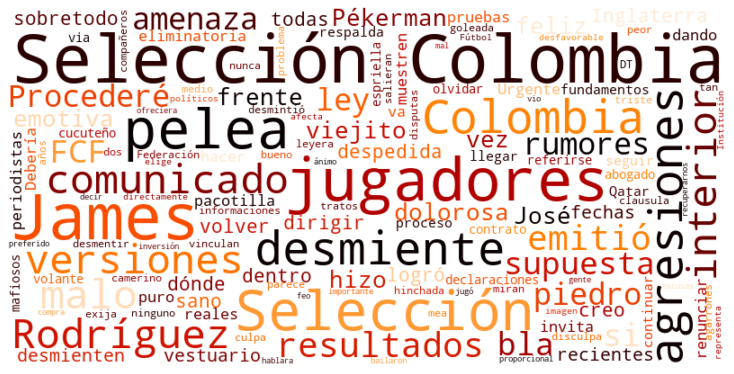

In [150]:
print("----------------------------------------Nube de palabras - Compound <= -0.5----------------------------------------------")
print()

data_neg = data[data['vader_compound'] <= -0.5]

palabras = data_neg.clean.str.cat(sep=' ')

wordcloud = WordCloud(width=800, height=400,
                     max_font_size=150, max_words=250,
                     background_color='white', colormap='gist_heat',
                     stopwords=stopwords).generate(palabras) # https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

----------------------------------------Nube de palabras - Compound >= 0.5----------------------------------------------



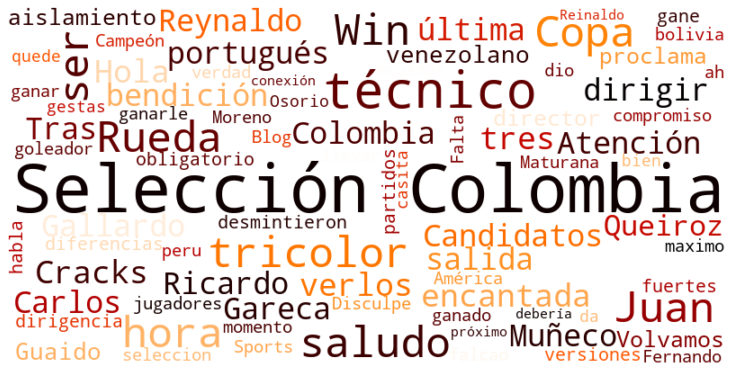

In [152]:
print("----------------------------------------Nube de palabras - Compound >= 0.5----------------------------------------------")
print()

data_pos = data[data['vader_compound'] >= 0.5]

palabras = data_pos.clean.str.cat(sep=' ')

wordcloud = WordCloud(width=800, height=400,
                     max_font_size=150, max_words=250,
                     background_color='white', colormap='gist_heat',
                     stopwords=stopwords).generate(palabras) # https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()